<a href="https://colab.research.google.com/github/Akshay-ramagiri/AI/blob/main/19K41A0555_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

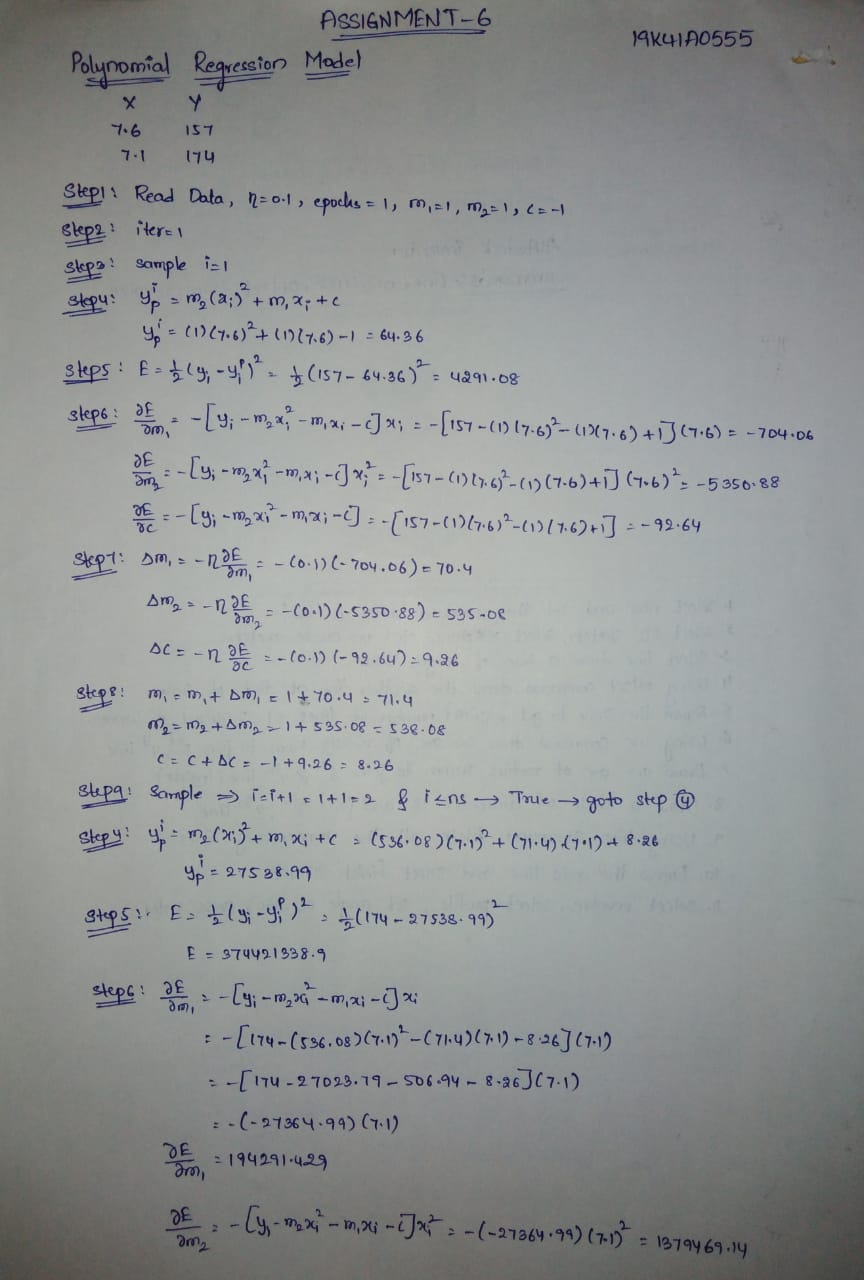

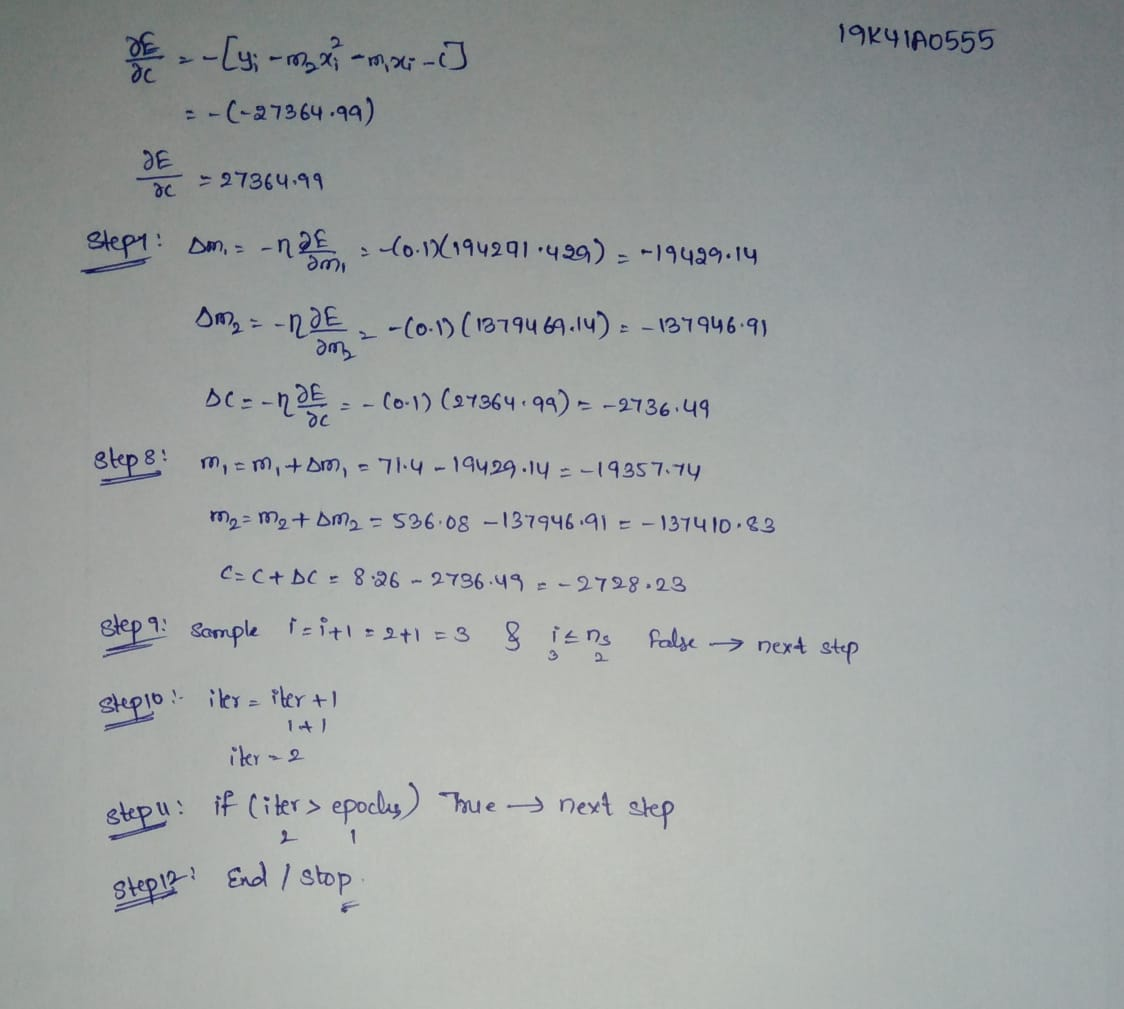

##Mount Google Drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Import required libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

##Import Data 

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Assignment_4.csv')
data.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


##Normalization

In [ ]:
xmax = np.max(data['X'])
xmin = np.min(data['X'])
data['X'] = (data['X'] - xmin) / (xmax - xmin)
ymax = np.max(data['Y'])
ymin = np.min(data['Y'])
data['Y'] = (data['Y'] - ymin) / (ymax - ymin)
data.head()

,X,Y
0,0.428571,0.537445
1,0.190476,0.612335
2,0.714286,0.616740
3,0.380952,0.674009
4,0.333333,0.599119


In [ ]:
data.isnull().sum()

X    0
Y    0
dtype: int64

##Data Split

In [ ]:
X = data['X']
Y = data['Y']
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.1, random_state=101)

##Initialization

In [ ]:
m1 = np.random.uniform(-10, 10)
m2 = np.random.uniform(-10, 10)
c = np.random.uniform(-10, 10)
eeta = 0.01
epochs = 10000

##Train the model

In [ ]:
for _ in range(epochs):
  for i in range(xtrain.shape[0]):
    x, y = xtrain.iloc[i], ytrain.iloc[i]
    ypred = (x ** 2) * m1 + x * m2 + c
    gradm1 = -1 * (x ** 2) * (y - ypred)
    gradm2 = -1 * x * (y - ypred)
    gradc = -1 * (y - ypred)
    m1 = m1 - eeta * gradm1
    m2 = m2 - eeta * gradm2
    c = c - eeta * gradc

#Display Model Parameters after training
print('Model Parameters :')
print('m1 =', m1)
print('m2 =', m2)
print('c =', c)

Model Parameters :
m1 = -0.1385495671655557
m2 = -0.2866312392606324
c = 0.6223948657034759


##Model Prediction on Training and Testing Data 

In [ ]:
ytrainPred = []
for x in xtrain:
  ytrainPred.append(m1 * (x ** 2) + m2 * x + c)
ytestPred = []
for x in xtest:
  ytestPred.append(m1 * (x ** 2) + m2 * x + c)

##Denormalize training, testing data and predicted values

In [ ]:
xtrain = xtrain * (xmax - xmin) + xmin
ytrain = ytrain * (ymax - ymin) + ymin
xtest = xtest * (xmax - xmin) + xmin
ytest = ytest * (ymax - ymin) + ymin
ytrainPred = np.multiply(ytrainPred, (ymax - ymin)) + ymin
ytestPred = np.multiply(ytestPred, (ymax - ymin)) + ymin

##Error Metrics

In [ ]:
MAE_Train = mean_absolute_error(ytrainPred, ytrain) #Testing MAE
MSE_Train = mean_squared_error(ytrainPred, ytrain) #Testing MSE
RMSE_Train = mean_squared_error(ytrainPred, ytrain) ** 0.5 #Testing RMSE
MAE_Test = mean_absolute_error(ytestPred, ytest) #Testing MAE
MSE_Test = mean_squared_error(ytestPred, ytest) #Testing MSE
RMSE_Test = mean_squared_error(ytestPred, ytest) ** 0.5 #Testing RMSE
print('Training Error :')
print('Mean Absolute Error :', MAE_Train)
print('Mean Squared Error :', MSE_Train)
print('Root Mean Squared Error :', RMSE_Train)
print('\nTesting Error :')
print('Mean Absolute Error :', MAE_Test)
print('Mean Squared Error :', MSE_Test)
print('Root Mean Squared Error :', RMSE_Test)

Training Error :
Mean Absolute Error : 44.64975203126369
Mean Squared Error : 2638.053843915876
Root Mean Squared Error : 51.36198831739164

Testing Error :
Mean Absolute Error : 45.52274965970051
Mean Squared Error : 3133.8040786798397
Root Mean Squared Error : 55.98039012618472


##Analyze training data predictions

In [ ]:
pd.DataFrame({'X_Train' : xtrain, 'Y_Train' : ytrain, 'Y_Train_Prediction' : ytrainPred})

,X_Train,Y_Train,Y_Train_Prediction
29,8.5,48.0,97.406710
26,8.4,35.0,103.001149
25,7.7,113.0,138.168473
27,7.4,125.0,151.100676
33,7.3,87.0,155.126143
2,8.2,175.0,113.762125
28,7.3,76.0,155.126143
19,7.9,155.0,128.833835
16,8.5,82.0,97.406710
10,8.1,215.0,118.928662


##Analyze testing data predictions

In [ ]:
pd.DataFrame({'X_Test' : xtest,'Y_Test' : ytest,'Y_Test_Prediction' : ytestPred})

,X_Test,Y_Test,Y_Test_Prediction
18,8.2,202.0,113.762125
7,8.0,190.0,123.952565
20,7.6,157.0,142.621841
30,7.8,147.0,133.572471


##Plotting the graph

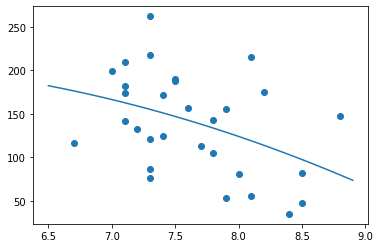

In [ ]:
plt.scatter(np.array(xtrain, xtest), np.array(ytrain, ytest))
x = np.array([i/10 for i in range(65, 90)])
xnorm = (x - xmin) / (xmax - xmin)
ypred = np.multiply(np.multiply(xnorm, xnorm), m1) + np.multiply(m2, xnorm) + c
y = np.multiply(ypred, ymax - ymin) + ymin
plt.plot(x, y)
plt.show()